# California Housing Price Machine Learning Prediction

## Context

California, Amerika Serikat merupakan destinasi idaman untuk dihuni. Kota-kota terkenal seperti Los Angeles, San Francisco, dan San Diego menjadi daya tarik utama. Cuaca yang cenderung hangat sepanjang tahun, keberagaman pantai yang memukau menjadi daya tarik tersendiri bagi masyarakat yang ingin menetap di sini. Menurut [Forbes Home](https://www.forbes.com/home-improvement/features/states-with-highest-home-prices/), California menempati peringkat kedua sebagai negara bagian termahal untuk memiliki properti, mulai dari harga rumah dan pajaknya. Terlepas dari itu, terdapat banyak peminat yang ingin menghuni di California. Pada dataset ini, tersedia informasi mengenai harga rumah di California pada tahun 1990, yang berasal dari data sensus pada tahun tersebut. Dataset ini terdokumentasi dalam karya ilmiah yang berjudul "Sparse Spatial Autoregressions" oleh R. Kelley Pace dan Ronald Barry. Dataset mencakup beragam informasi, seperti populasi, pendapatan median, median harga rumah, jumlah total kamar tidur, dan informasi lainnya. 



## Problem Statement

Sebagai **real estate developer**, **memprediksi harga rumah yang akurat dan dalam waktu yang singkat sangat krusial dalam bisnis mereka**. Hal tersebut berguna agar rumah yang dibangun cepat terjual dan tidak mengalami kerugian. **Prediksi melalui analisis harga pasar secara konvensional terkadang menghasilkan output yang tidak akurat** akibat subjektifitas para peneliti pada real estate developer dan juga **memakan waktu yang cenderung lama**. Untuk mengatasi masalah tersebut, **model machine learning** mampu menjawab atas permasalahan tersebut. **Oleh karena itu, diperlukan model machine learning untuk memberi harga prediksi rumah secara akurat dan waktu yang singkat**. 

## Goals

Berdasarkan permasalahan tersebut, **goals** dalam pemodelan **California Housing Price** adalah:
1. Memprediksi harga rumah yang akurat
2. Prediksi dilakukan dalam waktu yang cenderung sebentar

## Analytic Approach

Analisis dilakukan dengan menggunakan semua fitur-fitur dari dataset. Langkah selanjutnya adalah **menggunakan model regresi untuk memprediksi harga rumah**. Model ini akan dijadikan sebuah pertimbangan bagi real estate developer dalam memprediksi harga rumah yang akurat dalam waktu yang singkat.

## Metrics Evaluation

Penggunaan **metrics evaluation pada pemodelan ini**, adalah sebagai berikut:
1. **RMSE (Root Mean Square Error)**: memprediksi nilai aktual dengan mengukur rata-rata akar dari selisih kuadrat antara nilai prediksi dan nilai aktual.Semakin rendah nilainya, tingkat akurasi semakin tinggi.
2. **MAE (Mean Absolute Error)**:  mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual. Ini memberikan indikasi sejauh mana prediksi model dari nilai aktual dalam skala yang sama. MAE lebih tahan terhadap outlier dibandingkan RMSE.
3. **MAPE (Mean Absolute Percentage Error)**: mengukur rata-rata kesalahan persentase antara nilai prediksi dan nilai aktual. Ini memberikan pemahaman tentang sejauh mana prediksi model dari nilai aktual dalam bentuk persentase. MAPE berguna ketika perbandingan persentase kesalahan diperlukan.

## Data Understanding


Berikut merupakan penjelasan singkat mengenai nama kolom dan deskripsinya.

| Nama Kolom                      | Deskripsi                                                                   |
|---------------------------------|-----------------------------------------------------------------------------|
| longitude                                         | Pengukuran sejauh apa suatu rumah ke barat. Semakin tinggi nilainya, rumah tersebut semakin ke barat.                                         |
| latitude                            | Pengukuran sejauh apa suatu rumah ke utara. Semakin tinggi nilainya, rumah tersebut semakin ke utara.                                          |
| housing_median_age                         | Rata-rata usia rumah dalam suatu blok. Usia bangunan semakin baru apabila angkanya semakin rendah.                  |
| total_rooms                             | Total jumlah ruangan dalam suatu blok.                   |
| total_bedrooms                          | Total jumlah kamar tidur dalam suatu blok.                     |
| population                        | Jumlah populasi dalam suatu blok.                     |
| households                                 | Jumlah rumah tangga dalam suatu blok.                           |
| median_income                       |  Rata-rata pendapatan penduduk dalam suatu blok (US Dollar).                       |
| ocean_proximity                                | Lokasi rumah terkait jauh atau dekatnya dengan laut.              |
|  median_house_value                  | Rata-rata harga  suatu rumah dalam suatu blok (US Dollar).                        |

Dapat disimpulkan bahwa untuk memprediksi harga rumah, diperlukan target dan featuresnya. **dependent** dan **independent values**, adalah sebagai berikut:

- **Dependent value** = median_house_value
- **Independent values** = longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity

In [1]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pertama-tama, langkah yang dilakukan adalah dengan **mengimpor library** yang diperlukan untuk mengimpor dataset dan untuk EDA (Exploratory Data Analysis).

In [2]:
# Load Dataset

cali_house = pd.read_csv('data_california_house.csv')
cali_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


Kemudian, dataset telah diimpor. Dataset ini terdiri dari 14.448 baris dan 10 kolom.

In [3]:
# To see the Data Type, N Unique, and its sample

list_df = []
for col in cali_house.columns :
    list_df.append([
        col,
        cali_house[col].dtype,
        cali_house[col].nunique(),
        list(cali_house[col].drop_duplicates().sample(3).values)
    ])

pd.DataFrame(list_df, columns = ['Columns', 'Data Type', 'N Unique', 'Unique Sample'])

,Columns,Data Type,N Unique,Unique Sample
0,longitude,float64,806,"[-116.83, -121.84, -117.37]"
1,latitude,float64,836,"[32.82, 35.68, 34.93]"
2,housing_median_age,float64,52,"[6.0, 14.0, 31.0]"
3,total_rooms,float64,5227,"[1185.0, 1974.0, 9789.0]"
4,total_bedrooms,float64,1748,"[71.0, 2634.0, 707.0]"
5,population,float64,3498,"[2858.0, 573.0, 3689.0]"
6,households,float64,1649,"[1470.0, 1389.0, 346.0]"
7,median_income,float64,9797,"[4.5739, 5.592, 1.3291]"
8,ocean_proximity,object,5,"[INLAND, NEAR OCEAN, <1H OCEAN]"
9,median_house_value,float64,3548,"[158200.0, 214700.0, 225800.0]"


Dalam **data understanding**, diketahui bahwa kolom dengan **tipe data numerikal telah sesuai** dan tidak perlu diubah, **kecuali kolom ocean_proximity**. Data understanding telah selesai dilakukan dan langkah selanjutnya adalah **data cleaning**. Penanggulangan **kolom ocean_proximity** akan dilakukan pada **Feature Engineering**.

## Exploratory Data Analysis (EDA)


### Data Cleaning

In [4]:
#To know missing values from the dataset

cali_house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Selanjutnya, dilakukan Exploratory Data Analysis. Dari code di atas, ditemukan bahwa terdapat **137 missing values pada kolom 'total_bedrooms'**. 

### Fill Missing Values

<Axes: >

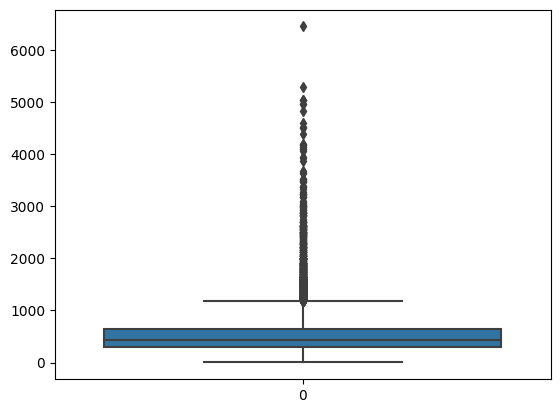

In [5]:
# To see data distribution in column 'total_bedrooms'

sns.boxplot(cali_house['total_bedrooms'])

In [6]:
# Fill missing values in column 'total_bedrooms' with median

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(cali_house[['total_bedrooms']])
cali_house['total_bedrooms'] = imputed_data


 Untuk menanggulangi missing value tersebut, kolom 'total_bedrooms' akan **diisi dengan median melalui simple imputer**. Hal tersebut disebabkan oleh kolom yang tidak berdistribusi normal sehingga menggunakan median. Distribusi tersebut dapat dilihat pada boxplot di bawah.

### Outliers in Numerical Columns

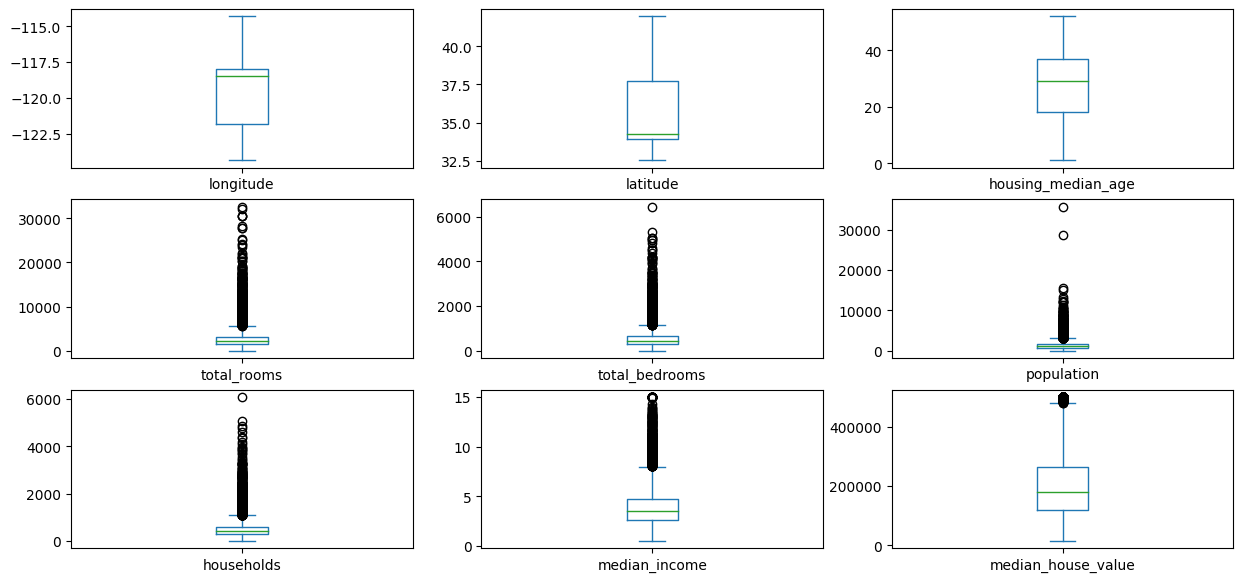

In [7]:
# To see outliers in numerical columns 

cali_house.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

Missing values telah ditanggulangi. Kemudian, periksa outliers pada dataset ini. Dari boxplot di atas, **terdapat  outliers pada kolom 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', dan 'median_house_value'**. Langkah selanjutnya adalah untuk melihat lebih jelas outliers dari gabungan boxplot di atas dengan **membuat variabel baru** untuk melihat ekstrem outliers.

<Axes: >

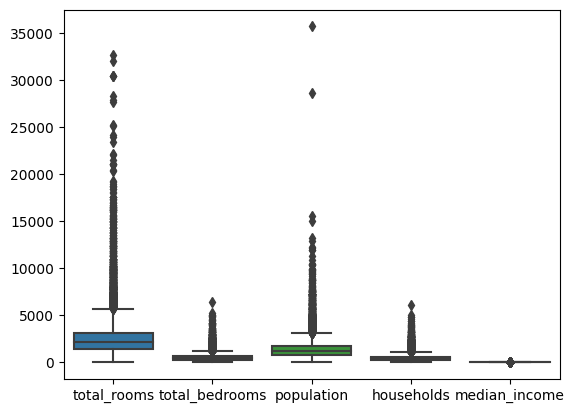

In [8]:
# Create new variable to see detailed Outliers
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Create a boxplot for the selected columns
sns.boxplot(data=cali_house[columns_to_plot])

Akan dibahas outliers pada masing-masing kolom. Pertama, kolom 'total_rooms' memiliki outliers yang paling jauh di atas 25.000. Oleh karena itu, berikut merupakan 10 baris yang outliersnya dari 'total_rooms' di atas 25.000.

In [9]:
# To know the rows from the outliers 'total_rooms'

cali_house[cali_house['total_rooms'] > 25000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
167,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,<1H OCEAN,321300.0
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
10900,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,INLAND,212200.0
11231,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,<1H OCEAN,451100.0
12079,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,NEAR OCEAN,399200.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0
12657,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,<1H OCEAN,339700.0
12960,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,<1H OCEAN,174300.0
13215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,<1H OCEAN,212300.0


In [10]:
# To know the rows from the outliers 'total_bedrooms'

cali_house[cali_house['total_bedrooms'] > 60000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


Pada kolom 'total_bedrooms' tidak ditemukan outliers karena data tersebut sudah di-fill dengan median melalui Simple Imputer di atas.

In [11]:
# To know the rows from the outliers 'population'

cali_house[cali_house['population'] > 25000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0


Pada kolom 'population', outliers ditemukan pada baris ke-4.124 dan ke-12.511 yang di mana sama seperti pada kolom 'total_rooms'

In [12]:
# To know the rows from the outliers 'households'

cali_house[cali_house['households'] > 5500]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0


Pada kolom 'households', outliers ditemukan pada baris ke-4.124 yang di mana sama seperti pada kolom 'total_rooms' dan kolom 'population'.

In [13]:
# Number of rows you want to calculate
rows_outliers = 10

# Total number of rows
total_rows = 14448

# Calculate the percentage
percentage = (rows_outliers / total_rows) * 100

# Print the result
print(f"{rows_outliers} rows out of {total_rows} rows is {percentage:.4f}%")

10 rows out of 14448 rows is 0.0692%


Langkah terakhir dalam penanganan outliers adalah melihat persentase dari keseluruhan data yang ada. Ditemukan 10 baris dari 14.448 baris. Hal ini menandakan bahwa hanya 0.0692% outliers yang terlalu esktrem. Oleh karena itu, **disimpulkan bahwa outliers dipertahankan dan tidak di-drop**.

### Duplicated Values

Mengisi missing values dan menangani outliers telah dilakukan sehingga langkah terakhir dari data cleaning adalah untuk melihat duplicated values.

In [14]:
# To check duplicated values

cali_house[cali_house.duplicated()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


Dari tabel di atas, tidak ditemukan duplikasi pada dataset ini.

### To ensure that the data has already been cleaned

Langkah terakhir adalah untuk memeriksa bahwa data telah siap untuk langkah selanjutnya.

In [15]:
#To check if the missing values has been filled

cali_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Summary dari data cleaning:
1. Terdapat 137 missing values pada kolom 'total_bedrooms'
2. Penanganan outliers yang dipertahankan
3. Tidak ada duplicated value

In [16]:
# Import library for EDA

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data cleaning telah selesai dan langkah selanjutnya adalah visualisasi data.

### Correlation between each numerical column

In [17]:
# Make new variable for Heatmap

cali_house_corr = cali_house[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value']].corr()
cali_house_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079059,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076247,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.328218,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.929750,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079059,-0.076247,-0.328218,0.929750,1.000000,0.871812,0.975467,-0.004124,0.045633
population,0.108161,-0.117704,-0.299736,0.853460,0.871812,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.975467,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004124,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045633,-0.026183,0.061581,0.693273,1.000000


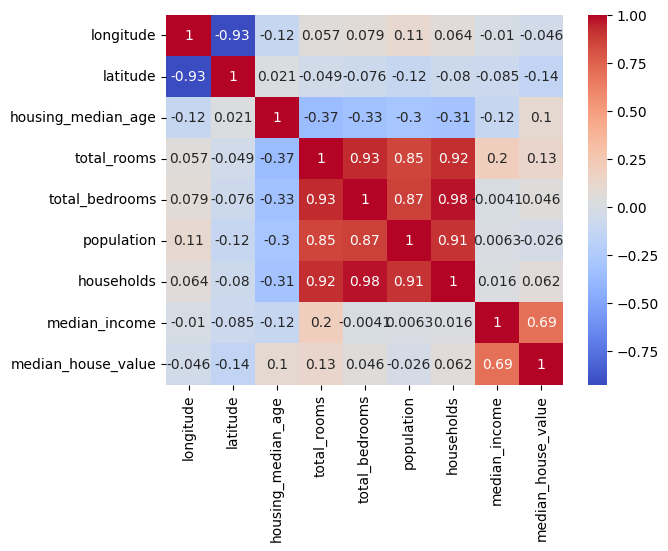

In [18]:
# Create Heatmap to see correlation between each numerical column

sns.heatmap(
    data = cali_house_corr,
    annot = True,
    cmap = 'coolwarm',
)

plt.show()

Dari heatmap di atas, dapat dibuktikan bahwa **'median_house_value' sebagai dependent variable memiliki korelasi yang sangat tinggi dengan 'median_income'**. Berikut urutan kolom dari yang sangat berkorelasi tinggi hingga berkorelasi rendah:
1. median_income
2. total_rooms
3. latitude
4. housing_median_age
5. households
6. total_bedrooms
7. longitude
8. population 


### Population Distribution based on Longitude and Latitude

<Figure size 1000x1000 with 0 Axes>

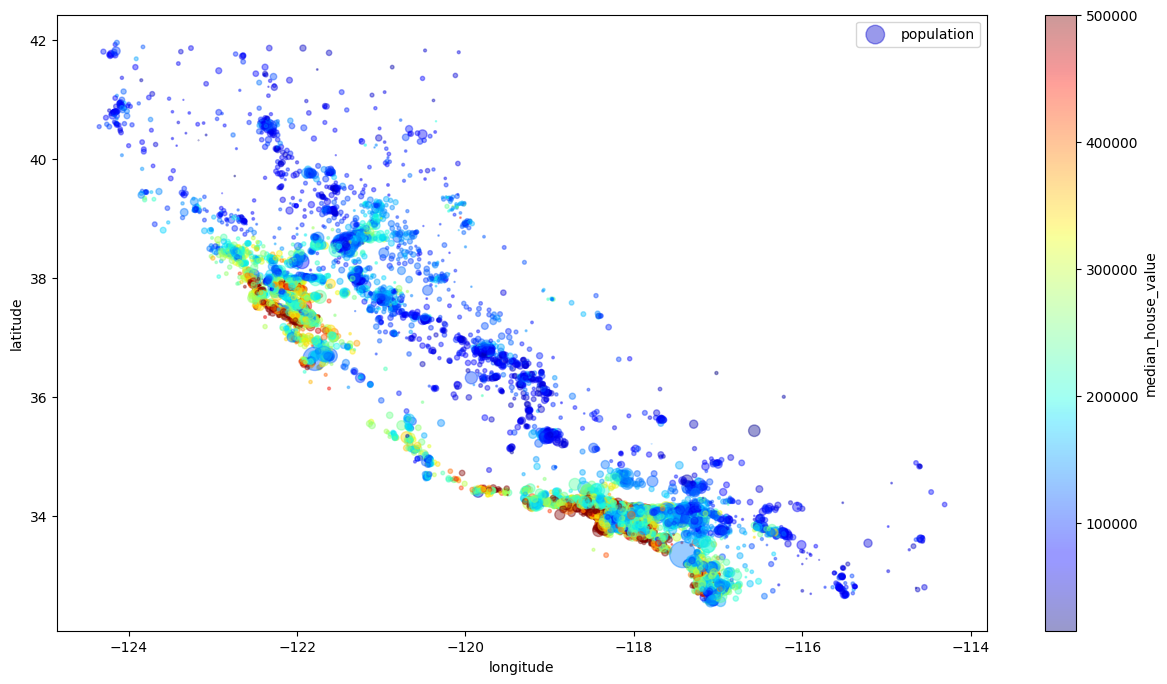

In [19]:
# Jet map scatterplot to see population distribution

plt.figure(figsize=(10,10));
cali_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=cali_house["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

Dari map di atas, ditemukan bahwa sedikit masyarakat di California menetap di **Inland**. Hal tersebut didominasi oleh warna biru yang menandakan populasinya cenderung sedikit. Warna biru menandakan populasinya semakin sedikit dan warna merah menandakan populasinya semakin banyak. Warna merah didominasi di bagian kiri pada map di atas yang dekat dengan laut. **Hal tersebut menunjukkan bahwa mayoritas populasi di California memilih untuk menetap dekat dengan laut akibat  keindahan pantainya di California**.

### Price House based on Ocean Proximity

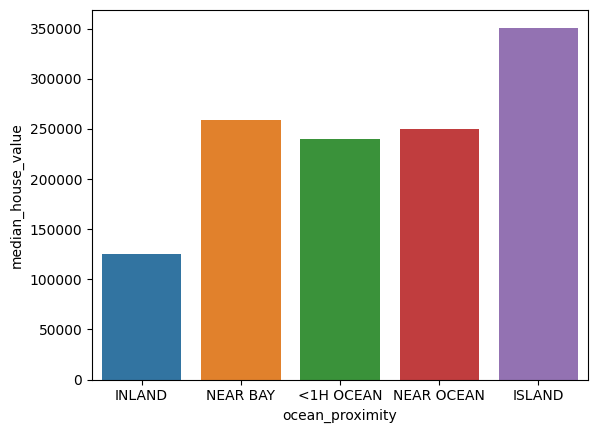

In [20]:
# Barplot about price house and ocean_proximity

ax = sns.barplot(
    data = cali_house,
    x = 'ocean_proximity', 
    y = 'median_house_value',
    ci= 0
)

Harga rumah berdasarkan harga paling rendah ke paling tinggi:
1. **ISLAND:** : 
   rumah yang terletak di pulau.
2. **<1H OCEAN:**
   rumah yang berjarak dekat dari Samudra Pasifik yang dapat dicapai dalam waktu berkendara kurang dari satu jam.
3. **NEAR OCEAN:**
   rumah yang berjarak dekat Samudra Pasifik, sedikit lebih jauh dibandingkan yang diklasifikasikan sebagai <1H OCEAN.
4. **NEAR BAY:**
   rumah yang dekat dengan pelabuhan.
5. **ISLAND:**
   rumah yang terletak di pulau.


Dari kedua barplot dan map di atas, dapat disimpulkan bahwa **California dengan keindahan pantai serta lautnya berkorelasi dengan distribusi populasinya dan juga harga rumah. Masyarakat memilih untuk menetap sedekat mungkin dengan pantai** sehingga harganya cenderung tinggi dibandingkan masyarakat yang menetap di Inland. Mereka yang menetap di sana tidak dikelilingi laut sehingga harga tergolong paling rendah di antara yang lain.

## Model

Exploratory Data Analysis telah dilakukan. Langkah selanjutnya adalah membuat model machine learning untuk memprediksi harga rumah. Pertama-tama, import library terlebih dahulu.

In [21]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Data Splitting 

Penentuan **dependent dan independent variable**, adalah sebagai berikut:

In [22]:
# Train and Test Splitting with 80:20 proportion

x = cali_house.drop(['median_house_value'],axis=1)
y = cali_house['median_house_value']


xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2023
)

Pada analisis ini, **semua kolom digunakan sebagai independent variable**, kecuali **kolom 'median_house_value'** yang dijadikan **dependent variablenya**. 

## Feature Engineering
### Encoding and Scaling
1. Encoding dilakukan untuk mengubah kolom kategorikal menjadi numerikal, khususnya pada **kolom 'total_bedrooms'** dengan menggunakan **Binary Encoder**. Alasan dari penggunaan Binary Encoder adalah adanya 5 nilai unik pada kolom tersebut sehingga tidak menggunakan **OneHotEncoding**

2. Scaling dilakukan dengan tujuan untuk membuat proporsi data menjadi seimbang dengan menggunakan **Robust Scaler**. Scaling dilakukan pada kolom-kolom numerikal pada independent variables.

In [23]:
# Feature Engineering scheme 

transformer = ColumnTransformer([
    ('Binary', ce.BinaryEncoder(),['ocean_proximity']),
    ('Scaler', RobustScaler(), ['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])
], remainder = 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Binary', BinaryEncoder(),
                                 ['ocean_proximity']),
                                ('Scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income'])])

### Benchmarking with 5 Potential Models

Berikut merupakan penentuan benchmarking dengan 5 potensi model:
1. Linear Regression
2. K-Nearest Neighbor Regression
3. Decision Tree Regression
4. Random Forest Regression
5. XGBoost Regression

In [24]:
# Benchmarking with 5 potential models

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2023)
rf = RandomForestRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023)


models = [lr, knn, dt, rf, xgb] 

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-73839.02430482 -70133.16003643 -68005.42459535 -66326.98603872
 -66303.36505443] LinearRegression()
[-52713.48225406 -50856.24089939 -49096.79890018 -48861.68242411
 -48813.15438958] LinearRegression()
[-0.29104631 -0.28507802 -0.28303033 -0.29043694 -0.28510381] LinearRegression()
[-66280.06433128 -65903.62139144 -61583.40664318 -60263.54319578
 -61309.94913429] KNeighborsRegressor()
[-44402.68408304 -44763.29359862 -42144.39991349 -42196.25331026
 -42231.21341411] KNeighborsRegressor()
[-0.22932304 -0.23878706 -0.23363334 -0.24265179 -0.23385797] KNeighborsRegressor()
[-77187.629506   -73385.47513895 -68658.83803272 -73831.97400751
 -67939.77709535] DecisionTreeRegressor(random_state=2023)
[-49325.57223183 -46957.90916955 -44299.2166955  -47500.60147122
 -44063.0428386 ] DecisionTreeRegressor(random_state=2023)
[-0.25733681 -0.24890754 -0.24694171 -0.27296591 -0.25187928] DecisionTreeRegressor(random_state=2023)
[-53782.68068548 -53121.74363544 -49432.22472766 -51383.44082367
 -499

Kemudian, dilakukan **evaluasi** yang **bertujuan untuk membandingkan 5 model yang terbaik**. 

In [25]:
# Evaluate result from 5 potential models

pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-68921.592006,2831.094937,-50068.271773,1522.693067,-0.286939,0.003200
1,KNN Regressor,-63068.116939,2510.690906,-43147.568864,1177.874116,-0.235651,0.004608
2,DecisionTree Regressor,-72200.738756,3453.533353,-46429.268481,1997.595313,-0.255606,0.009362
3,RandomForest Regressor,-51530.244465,1708.024349,-34012.778412,889.573774,-0.191189,0.007149
4,XGBoost Regressor,-50529.230132,2366.641214,-33461.682654,1122.178381,-0.185715,0.006997


Dari hasil evaluasi tersebut, model **XGBoost Regressor** dan **Random Forest Regressor** memiliki nilai rata-rata yang paling mendekati nol, sehingga dapat diasumsikan bahwa m**odel yang terbaik** berada di kedua model tersebut. Oleh karena itu, **kedua model akan diuji kembali** dengan melakukan **benchmarking**.

In [26]:
# Benchmark with the best 2 models

models = {
    'RandomForest Regressor': rf,
    'XGBoost Regressor': xgb
}

score_rmse = []
score_mae = []
score_mape = []


for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, ypred)))
    score_mae.append(mean_absolute_error(ytest, ypred))
    score_mape.append(mean_absolute_percentage_error(ytest, ypred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse,
                                    'MAE': score_mae,
                                    'MAPE': score_mape}, index=models.keys())
                                   
score_before_tuning

,RMSE,MAE,MAPE
RandomForest Regressor,50329.102783,33420.799398,0.189031
XGBoost Regressor,48118.383137,32152.216205,0.182189


**Nilai pada RMSE, MAE, dan MAPE pada model **XGBoost Regressor** lebih mendekati 0** dibandingkan model **RandomForest**. Hal tersebut menunjukkan bahwa model **XGBoost Regressor akan lebih akurat** untuk memprediksi harga rumah. Oleh karena itu, **XGBoost Regressor** dipilih sebagai model akhir.

## Hypeparameter Tuning
### XGBoost Regression

Benchmark telah dilakukan dengan hasil **XGBoost** merupakan model terbaik. Kemudian, akan dilakukan hyperparameter tuning. Langkah pertama untuk hyperparameter tuning adalah untuk melihat parameter yang ada.

In [27]:
# To display existed hyperparameter tuning

model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'model', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__Binary', 'preprocessing__Scaler', 'preprocessing__Binary__base', 'preprocessing__Binary__cols', 'preprocessing__Binary__drop_invariant', 'preprocessing__Binary__handle_missing', 'preprocessing__Binary__handle_unknown', 'preprocessing__Binary__mapping', 'preprocessing__Binary__return_df', 'preprocessing__Binary__verbose', 'preprocessing__Scaler__copy', 'preprocessing__Scaler__quantile_range', 'preprocessing__Scaler__unit_variance', 'preprocessing__Scaler__with_centering', 'preprocessing__Scaler__with_scaling', 'model__objective', 'model__base_score', 'model__booster', 'model__callbacks', 'model__colsample_bylevel', 'model__colsample_bynode', 'model__colsample_bytree', 'model__device

Lalu, membuat variable baru untuk menentukan parameter. Untuk setiap parameter yang dipilih, digunakan nilai rentang tertentu yang di dalamnya terdapat nilai default dari masing-masing parameter sehingga eksplorasinya bersifat efektif dan mencakup nilai yang luas dibandingkan menentukan satu angka saja.

In [28]:
# To determine parameter

paramxgb = {
    #Booster Parameters
    'model__colsample_bytree': list(np.arange(1, 11)/10),
    'model__gamma': list(np.arange(0, 10)), 
    'model__learning_rate': list(np.arange(1, 31)/100),
    'model__max_delta_step': list(np.arange(0, 11)),
    'model__max_depth': list(np.arange(1, 11)),
    'model__reg_alpha' : list(np.logspace(-3, 1, 20)),
    'model__reg_lambda': list(np.arange(1, 11)),
    'model__subsample': list(np.arange(1, 11)/10),
    }

Berikut merupakan variable untuk hyperparameter tuning.

In [29]:
# Create algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = paramxgb,
    n_iter = 100,
    cv = crossval, 
    scoring = {
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'mape': 'neg_mean_absolute_percentage_error'
               }, 
    n_jobs = -1,
    refit = 'rmse',
    random_state = 42  
)

Kemudian, fit data train untuk melihat parameter terbaik.

In [30]:
# Fit data train to see best parameter

random_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_proximity']),
                                                                              ('Scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'media...
                                                             0.8858667904100823,
                                                             1.438449888287663,
                                                             2.3357214690901213,
                                                             3.792690190732246,
                                                             6.158482110660261,
                                                             10.0],
                                        'model__reg_lambda': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0]},
                   random_state=42, refit='rmse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mape': 'neg_mean_absolute_percentage_error',
                            'rmse': 'neg_root_mean_squared_error'})

Hasil dari skor terbaik dan parameternya adalah sebagai berikut.

In [32]:
# Check best score dan parameter 
print('XGBoost')
print('Best score:', random_xgb.best_score_)
pd.DataFrame({'Parameter': random_xgb.best_params_})

XGBoost
Best score: -48754.21863727851


,Parameter
model__colsample_bytree,0.800000
model__gamma,5.000000
model__learning_rate,0.190000
model__max_delta_step,0.000000
model__max_depth,7.000000
model__reg_alpha,0.029764
model__reg_lambda,6.000000
model__subsample,1.000000


### After Tuning

Berikut merupakan output setelah dituning.

In [34]:
# Define model for best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict test set
ypred_xgb_tuning = xgb_tuning.predict(xtest)

# To save metrics RMSE, MAE & MAPE after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, ypred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(ytest, ypred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, ypred_xgb_tuning)

xgb_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['XGBoost Tuned'])
xgb_after_tuning

,RMSE,MAE,MAPE
XGBoost Tuned,46303.747815,31206.489852,0.175338


### Performance Comparison
Membandingkan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [36]:
# Before hyperparameter tuning
xgb_before_tuning = pd.DataFrame(score_before_tuning.loc['XGBoost Regressor']).T

In [37]:
# Comparison
xgb_compare = pd.concat([xgb_before_tuning, xgb_after_tuning])
xgb_compare

,RMSE,MAE,MAPE
XGBoost Regressor,48118.383137,32152.216205,0.182189
XGBoost Tuned,46303.747815,31206.489852,0.175338


Dari perbandingan di atas, ditunjukkan bahwa terdapat perubahan dari **XGBoost before Tuned** dengan **XGBoost Tuned**. **RMSE, MAE, dan MAPE** pada **XGBoost Tuned** mengalami penurunan dan mendekati angka nol. Hal tersebut membuktikan peningkatan kinerja model. Oleh karena itu, final modelnya adalah **XGBoost setelah dituning**.

## Final Model

Langkah selanjutnya adalah untuk memprediksi test set dengan menggunakan hyperparameter yang terpilih.

In [35]:
# Define model for best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict test set
ypred_xgb_tuning = xgb_tuning.predict(xtest)

# To save metrics RMSE, MAE & MAPE after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, ypred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(ytest, ypred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, ypred_xgb_tuning)

xgb_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['XGBoost Tuned'])
xgb_after_tuning

,RMSE,MAE,MAPE
XGBoost Tuned,46303.747815,31206.489852,0.175338


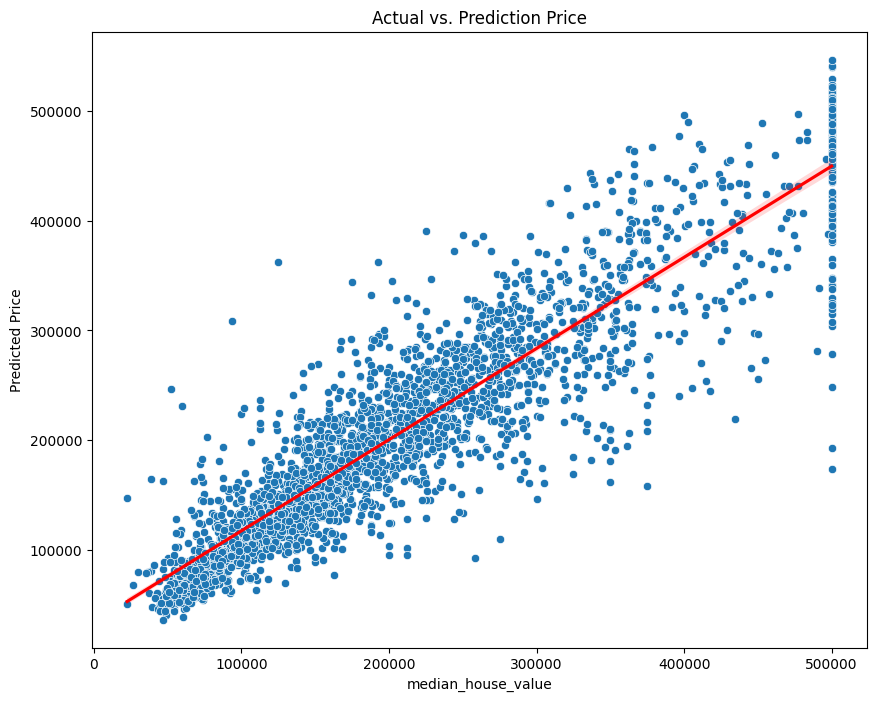

In [38]:
# Create a scatterplot between Actual and Predicted Price
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ytest, y=ypred_xgb_tuning).set(
    title='Actual vs. Prediction Price', 
    xlabel='Actual Price', 
    ylabel='Predicted Price'
)

# Calculate the OLS regression line
sns.regplot(x=ytest, y=ypred_xgb_tuning, scatter=False, color='red')

plt.show()


Pada plot di atas, terdapat garis merah yang **mengarah dari positive menuju negative correlation**. Hal tersebut menunjukkan bahwa **XGBoost Model** memiliki kecenderungan untuk **memperkirakan harga rumah di bawah nilai sebenarnya (underestimation)**.

## Feature Importance

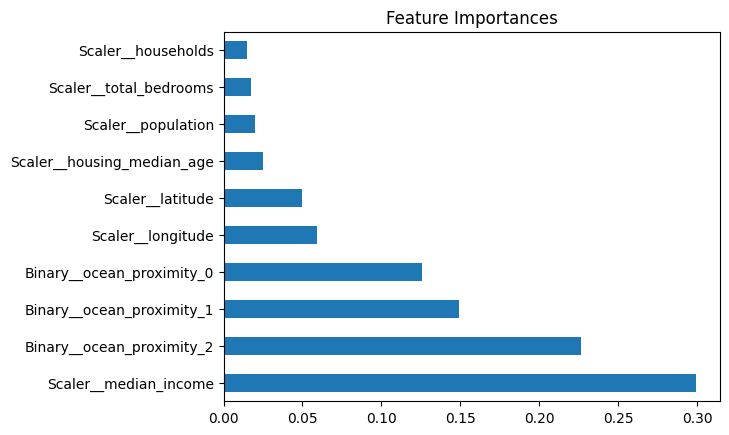

In [39]:
# Plot feature importance

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
feature_imp.plot(kind='barh', title='Feature Importances');

Dari barplot di atas, dapat disimpulkan bahwa **fitur yang paling mempengaruhi harga rumah di California** adalah **median dari penghasilan penduduk tersebut (kolom 'median_income')** dan **letak rumah berdasarkan posisi laut (kolom 'ocean_proximity')**. Pada konteks ini, masyarakat ingin lebih mudah dan memakan waktu yang singkat untuk mengakses pantai di California. **Lokasi rumah yang semakin dekat dengan pantai, semakin mahal harga rumahnya akibat demand yang tinggi**. Harga rumah yang semakin mahal, semakin dekat dengan pantai. Oleh karena itu, pendapatan masyarakat juga berpengaruh kepada kemampuan untuk membeli properti. **Pendapatan masyarakat mencerminkan sejauh mana masyarakat mampu membeli rumah. Semakin tinggi median income, semakin besar kemampuan penduduk untuk membeli rumah dengan harga yang lebih tinggi**. **Hal tersebut dapat mendorong peningkatan permintaan akan rumah, yang pada akhirnya dapat meningkatkan harga rumah**. Selain itu, longitude (letak rumah yang semakin atau tidaknya ke barat) dan latitude (letak rumah yang semakin atau tidaknya ke utara) juga cukup berpengaruh. Fitur yang paling tidak mempengaruhi adalah rata-rata usia rumah dalam satu blok (kolom 'housing_median_age'), kolom 'total_bedrooms, dan kolom 'households'. 



## Save Model

**XGBoost** adalah model yang terbaik untuk memprediksi harga rumah di California, Amerika Serikat. Oleh karena itu, langkah terakhir adalah dengan menyimpan model tersebut dalam format .sav.

In [40]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(xtrain, ytrain)

pickle.dump(estimator, open('CaliforniaHousingPrice_RegressionModel_XGB.sav', 'wb'))

In [41]:
#Load model

filename = 'CaliforniaHousingPrice_RegressionModel_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [42]:
# Save model
np.sqrt(mean_squared_error(ytest, loaded_model.predict(xtest)))

48118.383136982986

## Conclusion in Business Context

1. **Dari segi biaya dan waktu**
    Untuk memprediksi harga rumah, penelitian real estate developer membutuhkan waktu 8 minggu, tetapi dengan machine learning membutuhkan waktu 1 hingga 3 hari. Biaya penelitian real estate developer adalah $100 sehingga totalnya adalah $5.600, sedangkan maksimal biaya dengan machine learning adalah $300. Dengan menggunakan machine learning, anggaran dapat  dihemat dan waktu pelaksanaan menjadi lebih singkat.
2. **Dari segi actual dan predicted price**
    Nilai error sebanyak 17.5338% dengan rata-rata harga rumah dari kolom median_house_value adalah $206.824. Perhitungannya adalah sebagai berikut:
    17.5338% dari $206.824 adalah $36.17.

Oleh karena itu, berikut merupakan harga prediksi rumah apabila terjadi overestimation dan underestimation
- Harga prediksi yang overestimate: $206.824 + $36.17 =  $204.207
- Harga prediksi yang underestimate: $206.824 - $36.17 =  $210.441


## Recommendation in Business Context

1. **Pemanfaatkan Model Machine Learning**: disarankan untuk mengimplementasikan model machine learning dalam proses prediksi harga rumah. Model ini dapat memberikan prediksi yang lebih akurat dan efisien daripada metode konvensional. Selain itu, lakukan validasi model secara berkala untuk memastikan bahwa model machine learning tetap akurat seiring berjalannya waktu. Hal ini penting karena pasar real estate cenderung berubah seiring berjalannya waktu.

2. **Optimisasi Waktu**: Manfaatkan model machine learning untuk menghasilkan prediksi dalam waktu yang lebih singkat. Dengan demikian, real estate developer mampu memprediksi harga dengan waktu yang cenderung singkat dibandingkan metode konvensional.

3. **Libatkan Data Scientist**: Meskipun model machine learning dapat memberikan prediksi yang akurat, peran data scientist dalam industri real estate tetap penting. Mereka dapat mengoptimalkan machine learning dengan data yang telah tersedia dari real estate developer.
